# **Exploratory Data Analysis : Zomato Restaurants In India**

##**Introduction**
EDA is a prelimnary part of Machine Learning and is used extensively in this field.

Although it is not necessary to perform EDA in order to build models but EDA can help us know our data better and also provides us with some of the greatest insights which are not easy to witness directly in the complex datasets.

In this notebook I have performed a detailed analysis on Indian Restaurants from Zomato.

Following are the things that I learned from this EDA project:

1. Knowing basic composition of data

2. Removing duplicates

3. Dealing with missing values

4. Understanding features

5. Plotting horizontal bar charts (multicoloured)

6. using groupby, apply, and unique functions

7. Scatter plot

8. word cloud

9. box plot

10. density plot

11. bar charts

12. Drawing insights and conclusions from data

## **Project Outline**

* Importing

* Preprocessing
** Exploring Data
** Removing duplicates
** Dealing with missing values
** Ommiting unuseful features
* EDA
** Restaurant Chains
**  ----- Chains Vs Outlets
**  ----- Top restaurant chains (by number of outlets)
**  ----- Top restaurant chains (by average rating)
** Establishment Types
**  ----- Number of Restaurants
**  ----- Average rating, votes, Photocounts
** Cities
**  ----- Number of Restaurants
**  ----- Average rating, votes, Photocounts
** Cuisine
**  ----- Total number of unique cuisine
**  ----- Number of Restaurants
**  ----- Highest rated cuisines
** Rating and Cost
**  ----- Rating distribution
**  ----- Average cost for two distribution
**  ----- Price range count
**  ----- Relation between Average price for two and rating
**  ----- Relation between Price Range and rating
**  ----- Relation between Votes and rating
* Conclusions

## **Importing necessary libraries**



In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
from wordcloud import WordCloud

## **Preprocessing**

### **Exploring Data**

In [221]:
path = "/content/drive/MyDrive/Mitali IBM Data Analysis Project/zomato_gurgaon.csv"
data = pd.read_csv(path)
# data = pd.read_csv("zomato_gurgaon.csv")
# data

In [83]:
data.head(3)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,18601364,AB's - Absolute Barbecues,['Casual Dining'],https://www.zomato.com/ncr/abs-absolute-barbec...,"Shop LG 1-3, MGF Metropolis Mall, MG Road, Gur...",Gurgaon,1,"MGF Metropolis Mall, MG Road",28.479642,77.081089,...,3,Rs.,"['Lunch', 'Mall Parking', 'Takeaway Available'...",4.6,Excellent,4305,1850,0,-1,-1
1,18418247,Feel Alive,['Pub'],https://www.zomato.com/ncr/feel-alive-sector-2...,"SCO 53, 2nd Floor, Main Market, Sector 29, Gur...",Gurgaon,1,Sector 29,28.467937,77.064138,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.9,Excellent,2095,6768,0,-1,-1
2,18337894,Prankster,['Microbrewery'],https://www.zomato.com/ncr/prankster-sector-29...,"Site 8-10, Sector 29, Gurgaon",Gurgaon,1,Sector 29,28.468997,77.063310,...,3,Rs.,"['Cash', 'Dinner', 'Lunch', 'Debit Card', 'Cre...",4.2,Very Good,4899,17702,0,-1,-1


In [84]:
data.tail(3)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
1287,18416827,Norenj Wine Dine & Fresh Beer Cafe,['Casual Dining'],https://www.zomato.com/ncr/norenj-wine-dine-fr...,"Plot 1, SS Plaza Mall, Block A, Mayfield Garde...",Gurgaon,1,South City 2,28.427031,77.057154,...,3,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",4.1,Very Good,1099,1036,0,-1,-1
1288,306150,Imperfecto,['Casual Dining'],https://www.zomato.com/ncr/imperfecto-dlf-cybe...,"2nd Floor, Cyber Hub, DLF Cyber City, Gurgaon",Gurgaon,1,"Cyber Hub, DLF Cyber City",28.496071,77.088799,...,3,Rs.,"['Takeaway Available', 'Lunch', 'Dinner', 'Cas...",3.9,Good,3404,1826,0,-1,-1
1289,18649486,The Drunken Botanist,['Bar'],https://www.zomato.com/ncr/the-drunken-botanis...,"Unit 1B & 1C, Upper Ground Floor-C, Building 1...",Gurgaon,1,"Cyber Hub, DLF Cyber City",28.493674,77.088334,...,4,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Se...",4.4,Very Good,5554,7475,0,-1,-1


In [85]:
data.shape

(1290, 26)

Our dataset has 26 features and 1290 rows.

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                1290 non-null   int64  
 1   name                  1290 non-null   object 
 2   establishment         1290 non-null   object 
 3   url                   1290 non-null   object 
 4   address               1290 non-null   object 
 5   city                  1290 non-null   object 
 6   city_id               1290 non-null   int64  
 7   locality              1290 non-null   object 
 8   latitude              1290 non-null   float64
 9   longitude             1290 non-null   float64
 10  zipcode               497 non-null    float64
 11  country_id            1290 non-null   int64  
 12  locality_verbose      1290 non-null   object 
 13  cuisines              1290 non-null   object 
 14  timings               1290 non-null   object 
 15  average_cost_for_two 

In [87]:
data.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

Now, we will find the zomato restaurants located in sector 14 gurgaon

In [88]:
data[data["locality_verbose"] == "Sector 14, Gurgaon"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
28,549,Dana Choga,['Casual Dining'],https://www.zomato.com/ncr/dana-choga-sector-1...,"5 & 6, Atul Kataria Chowk, Sector 14, Gurgaon",Gurgaon,1,Sector 14,28.482319,77.049504,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'Dinner',...",4.7,Excellent,2944,395,0,1,-1
72,5056,Om Sweets & Snacks,['Quick Bites'],https://www.zomato.com/ncr/om-sweets-snacks-se...,"84-85, Shopping Complex, Sector 14, Gurgaon",Gurgaon,1,Sector 14,28.473471,77.047848,...,2,Rs.,"['Lunch', 'Delivery', 'Breakfast', 'Dinner', '...",4.1,Very Good,1621,698,0,1,-1
142,18462214,Bakingo,['Bakery'],https://www.zomato.com/ncr/bakingo-sector-14-g...,"C2, Old DLF Colony, Sector 14, Gurgaon",Gurgaon,1,Sector 14,28.469902,77.044784,...,1,Rs.,"['No Seating Available', 'Cash', 'Credit Card'...",4.0,Very Good,392,230,0,-1,-1
145,5056,Om Sweets & Snacks,['Quick Bites'],https://www.zomato.com/ncr/om-sweets-snacks-se...,"84-85, Shopping Complex, Sector 14, Gurgaon",Gurgaon,1,Sector 14,28.473471,77.047848,...,2,Rs.,"['Lunch', 'Delivery', 'Breakfast', 'Dinner', '...",4.1,Very Good,1621,698,0,-1,-1
159,6303,Gulab,['Quick Bites'],https://www.zomato.com/ncr/gulab-sector-14-gur...,"SCF 77, Huda Market, Sector 14, Gurgaon",Gurgaon,1,Sector 14,28.473113,77.048047,...,1,Rs.,"['Breakfast', 'Lunch', 'Delivery', 'Credit Car...",3.7,Good,406,311,0,-1,-1
187,6709,Indian & Chinese Corner,['Dhaba'],https://www.zomato.com/ncr/indian-chinese-corn...,"Shop 76, Sector 14, Gurgaon",Gurgaon,1,Sector 14,28.473030,77.048001,...,1,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",3.8,Good,128,8,0,-1,-1
203,4122,Republic of Chicken,['Butcher Shop'],https://www.zomato.com/ncr/republic-of-chicken...,"SG 28, Sector 14, Gurgaon",Gurgaon,1,Sector 14,28.473397,77.048570,...,1,Rs.,"['No Seating Available', 'Dinner', 'Delivery',...",2.8,Average,18,15,0,-1,-1
302,18521230,Chinar RestroBar,['Pub'],https://www.zomato.com/ncr/chinar-restrobar-se...,"Main Atul Kataria Chowk, Sector 14, Gurgaon",Gurgaon,1,Sector 14,28.480741,77.047944,...,2,Rs.,"['Delivery', 'Serves Alcohol', 'Lunch', 'Cash'...",2.9,Average,9,9,0,-1,-1
311,18602059,Madhushala Restaurant,['Pub'],https://www.zomato.com/ncr/madhushala-restaura...,"Atul Kataria Chowk, Sector 14, Gurgaon",Gurgaon,1,Sector 14,28.481305,77.050247,...,2,Rs.,"['Cash', 'Debit Card', 'Lunch', 'Credit Card',...",0.0,Not rated,2,2,0,-1,-1
389,300174,Frontier,['Confectionery'],https://www.zomato.com/ncr/frontier-sector-14-...,"59, 1143-336/2, Excel House, Old Delhi Road, O...",Gurgaon,1,Sector 14,28.474115,77.042464,...,1,Rs.,"['No Seating Available', 'Cash', 'Takeaway Ava...",3.1,Average,9,8,0,-1,-1


In [89]:
data.describe()

,res_id,city_id,latitude,longitude,zipcode,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,1.290000e+03,1290.0,1290.000000,1290.000000,497.000000,1290.0,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.0,1290.000000,1290.0
mean,1.228214e+07,1.0,28.465939,77.075516,78799.422535,1.0,1333.906977,2.586047,4.048837,1131.368992,1474.261240,0.0,-0.341085,-1.0
std,8.743008e+06,0.0,0.027040,0.023207,58406.907196,0.0,980.867046,1.039540,0.700351,1357.455265,2347.007722,0.0,0.939572,0.0
min,2.700000e+02,1.0,28.341996,76.928723,0.000000,1.0,80.000000,1.000000,0.000000,0.000000,0.000000,0.0,-1.000000,-1.0
25%,3.073680e+05,1.0,28.453234,77.062650,0.000000,1.0,500.000000,2.000000,3.900000,187.500000,131.250000,0.0,-1.000000,-1.0
50%,1.838414e+07,1.0,28.468297,77.081701,122002.000000,1.0,1200.000000,3.000000,4.200000,593.500000,506.000000,0.0,-1.000000,-1.0
75%,1.863688e+07,1.0,28.485086,77.091778,122002.000000,1.0,1800.000000,3.000000,4.400000,1402.000000,2013.000000,0.0,1.000000,-1.0
max,1.914658e+07,1.0,28.515683,77.147459,122021.000000,1.0,6000.000000,4.000000,4.900000,5958.000000,17702.000000,0.0,1.000000,-1.0


In [90]:
data.drop_duplicates(["res_id"], keep = 'first', inplace = True)

Now, we will remove duplicate values using the restaurant ID feature to remove any duplicacy among the data set.

In [91]:
data.shape

(610, 26)

Oops! Looks like 50% of our dataset was duplicated, now that we have removed the duplicate rows we can perform better analysis.

## Dealing with the missing **values**

let's check how many colums have missing values

In [92]:
data.isnull().sum()

res_id                    0
name                      0
establishment             0
url                       0
address                   0
city                      0
city_id                   0
locality                  0
latitude                  0
longitude                 0
zipcode                 412
country_id                0
locality_verbose          0
cuisines                  0
timings                   0
average_cost_for_two      0
price_range               0
currency                  0
highlights                0
aggregate_rating          0
rating_text               0
votes                     0
photo_count               0
opentable_support         0
delivery                  0
takeaway                  0
dtype: int64

After taking the look at above output, we can see that zipcode feature has more thn 80% missing values, therefore, it best to not consider that column at all so that we can perform better at anlaysing.

##**Omitting unuseful features**

In [93]:
data["establishment"].unique()

array(["['Casual Dining']", "['Pub']", "['Microbrewery']",
       "['Sweet Shop']", "['Lounge']", "['Quick Bites']", "['Bar']",
       "['Fine Dining']", "['Food Court']", "['Dessert Parlour']",
       "['Beverage Shop']", "['Café']", "['Bakery']", "['Dhaba']",
       "['Butcher Shop']", "['Kiosk']", "['Club']", "['Food Truck']",
       "['Confectionery']", "['Cocktail Bar']", "['Paan Shop']",
       "['Bhojanalya']", '[]'], dtype=object)

In [94]:
print(data["establishment"].unique()[0])
print(type(data["establishment"].unique()[0]))

['Casual Dining']
<class 'str'>


establishment looks like a nice feature to perform EDA but each value has an unwanted square bracket and quotes which are not useful to us.
So we will remove them with the apply() function.

In [95]:
print(data["establishment"].unique()[0])
data["establishment"] = data["establishment"].apply(lambda x:x[2:-2])
print(data["establishment"].unique()[0])

print(data["establishment"].unique()[0])
data["establishment"] = data["establishment"].apply(lambda x : np.where(x == "", "NA", x))
print(data["establishment"].unique()[0])

['Casual Dining']
Casual Dining
Casual Dining
Casual Dining


In [96]:
data["establishment"].unique()

array(['Casual Dining', 'Pub', 'Microbrewery', 'Sweet Shop', 'Lounge',
       'Quick Bites', 'Bar', 'Fine Dining', 'Food Court',
       'Dessert Parlour', 'Beverage Shop', 'Café', 'Bakery', 'Dhaba',
       'Butcher Shop', 'Kiosk', 'Club', 'Food Truck', 'Confectionery',
       'Cocktail Bar', 'Paan Shop', 'Bhojanalya', 'NA'], dtype=object)

In [97]:
len(data[data["locality"] == "Ardee City"])

2

In [98]:
len(data[data["locality"] == "DLF Cyber City"])

12

In [99]:
len(data["locality"].unique())

107

In [215]:
data["locality"].nunique()

107

In [223]:
print(data["cuisines"].nunique())
# print(data["cuisines"].unique())

340


In [102]:
data["cuisines"] = data["cuisines"].fillna("no cuisine")

In [103]:
data["cuisines"] == "no cuisines"
# len(data[data["cuisines"] == "no cuisines"])

0       False
1       False
2       False
3       False
4       False
        ...  
1006    False
1007    False
1009    False
1010    False
1011    False
Name: cuisines, Length: 610, dtype: bool

In [224]:
print(data["timings"].nunique())
# print(data["timings"].unique())

311


In [105]:
print(data["average_cost_for_two"].nunique())

49


In [106]:
print(data["price_range"].unique())

[3 2 4 1]


In [107]:
print(data["highlights"].nunique())
# print(data["highlights"].unique())

568


In [108]:
data[["aggregate_rating", "votes", "photo_count"]].describe().loc[["mean", "min", "max"]]

,aggregate_rating,votes,photo_count
mean,3.828525,613.180328,678.491803
min,0.000000,0.000000,0.000000
max,4.900000,5958.000000,17702.000000


In [109]:
outlets = data["name"].value_counts()

In [110]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [111]:
chains

Giani's                11
Om Sweets & Snacks      9
Chai Peeni Hai          8
Chai Point              7
Green Chick Chop        6
                       ..
Meatatarian             2
Cake 24x7               2
Frontier                2
Cake Desire             2
Vapour Bar Exchange     2
Name: name, Length: 67, dtype: int64

In [112]:
# print("Total Restaurants = ",data.shape[0])
# print("Total restaurants that are part of some chain : ",data.shape[0] - single.shape[0])
print("Percentage of restaurants that are part of some chain : ",(data.shape[0] - single.shape[0]) / data.shape[0] * 100)

Percentage of restaurants that are part of some chain :  33.9344262295082


As we can see that 80.9% of restaurants in Gurgaon are part of some chain.

In [124]:
top10chains = data["name"].value_counts()[:10].sort_values(ascending=True)

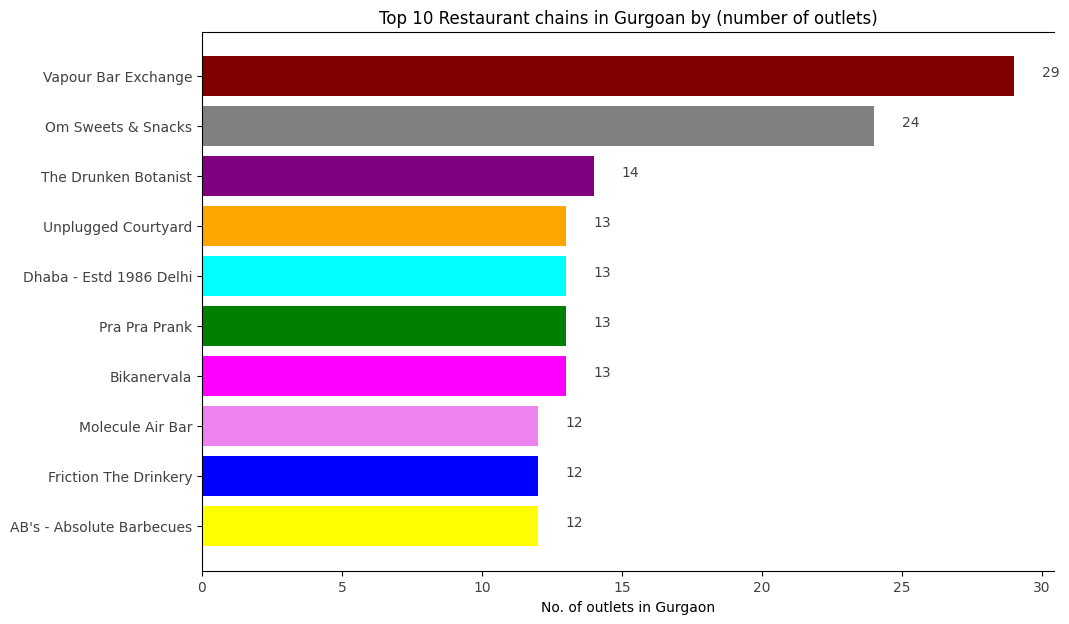

In [127]:
height = top10chains.values
bars = top10chains.index
ypos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible("#424242")
ax.spines["bottom"].set_visible("#424242")

colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
random.shuffle(colors)
plt.barh(ypos, height, color = colors)

plt.xticks(color = "#424242")

plt.yticks(ypos, bars, color = "#424242")
plt.xlabel("No. of outlets in Gurgaon")

for i, v in enumerate(height):
  ax.text(v+1, i, str(v), color = "#424242")

plt.title("Top 10 Restaurant chains in Gurgoan by (number of outlets)")

plt.show()

In [128]:
outlets = data["name"].value_counts()

In [129]:
atleast5outlets = outlets[outlets > 4]

In [130]:
top10chains2 = data[data["name"].isin(atleast5outlets.index)].groupby("name").mean()["aggregate_rating"].sort_values(ascending = False)[:10]

<ipython-input-130-aadd209e8811>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top10chains2 = data[data["name"].isin(atleast5outlets.index)].groupby("name").mean()["aggregate_rating"].sort_values(ascending = False)[:10]


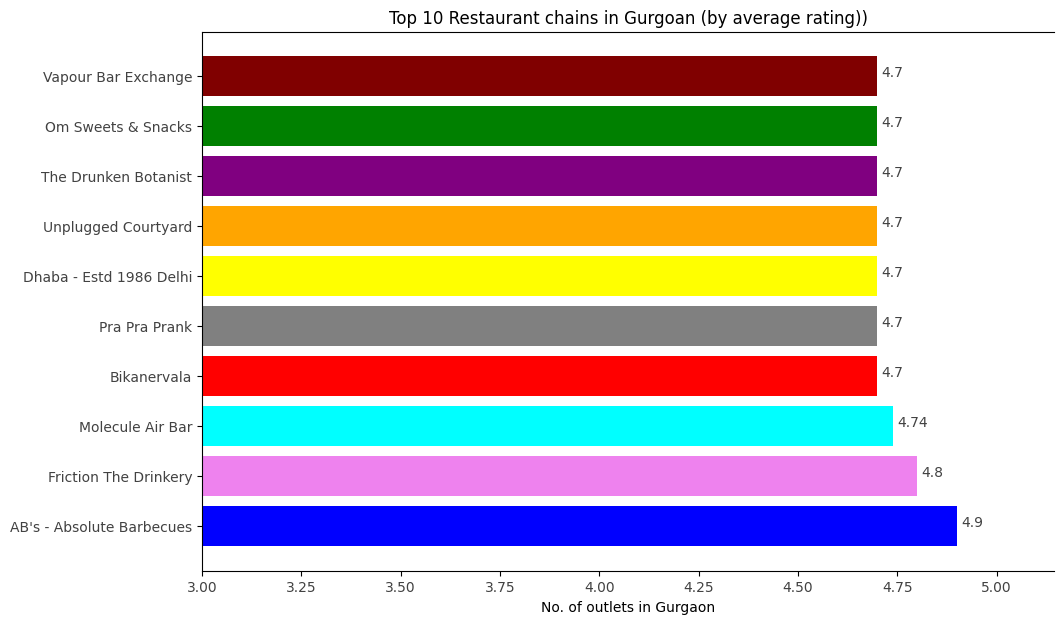

In [131]:
height = pd.Series(top10chains2.values).map(lambda x : np.round(x, 2))
bars = top10chains.index
ypos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible("#424242")
ax.spines["bottom"].set_visible("#424242")

colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
random.shuffle(colors)
plt.barh(ypos, height, color = colors)

plt.xlim(3)
plt.xticks(color = "#424242")
plt.yticks(ypos, bars, color = "#424242")
plt.xlabel("No. of outlets in Gurgaon")

for i, v in enumerate(height):
  ax.text(v+0.01, i, str(v), color = "#424242")

plt.title("Top 10 Restaurant chains in Gurgoan (by average rating))")

plt.show()

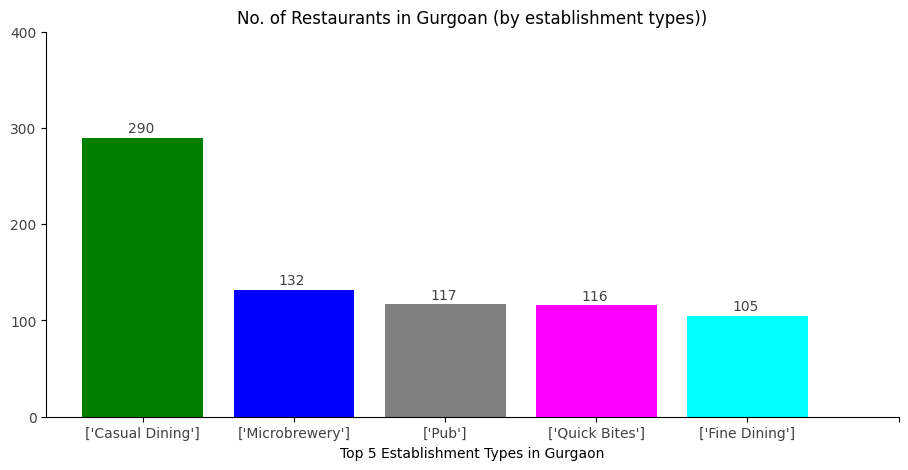

In [146]:
est_count = data.groupby("establishment").count()["res_id"].sort_values(ascending = False)[:5]
bars = est_count.index
ypos = np.arange(len(bars))

fig = plt.figure(figsize=[11,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible("#424242")
ax.spines["bottom"].set_visible("#424242")

colors = ["green","blue","magenta","cyan","gray"]
random.shuffle(colors)
plt.bar(est_count.index, est_count.values, color = colors)

# plt.xlim()
plt.xticks(range(0, 6), color = "#424242")
plt.yticks(range(0, 500, 100), color = "#424242")
plt.xlabel("Top 5 Establishment Types in Gurgaon")

for i, v in enumerate(est_count):
  ax.text(i-0.1, v+5, str(v), color = "#424242")

plt.title("No. of Restaurants in Gurgoan (by establishment types))")

plt.show()

In [147]:
ratingByEst = data.groupby("establishment").mean()["aggregate_rating"].sort_values(ascending = False)[:10]
ratingByEst

<ipython-input-147-8eeefaeaf430>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratingByEst = data.groupby("establishment").mean()["aggregate_rating"].sort_values(ascending = False)[:10]


establishment
['Microbrewery']     4.459848
['Bar']              4.389231
['Casual Dining']    4.299310
['Beverage Shop']    4.240741
['Cocktail Bar']     4.233333
['Café']             4.108475
['Fine Dining']      4.077143
[]                   4.052174
['Lounge']           4.047500
['Bakery']           4.034000
Name: aggregate_rating, dtype: float64

In [148]:
data.groupby("establishment").mean()["votes"].sort_values(ascending = False)[:10]

<ipython-input-148-a0dcde5df495>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("establishment").mean()["votes"].sort_values(ascending = False)[:10]


establishment
['Bar']              2004.892308
['Casual Dining']    1942.448276
['Microbrewery']     1805.075758
['Lounge']           1498.050000
['Pub']              1300.282051
['Cocktail Bar']     1297.000000
['Sweet Shop']       1175.695652
['Café']              834.881356
['Quick Bites']       660.818966
['Fine Dining']       573.390476
Name: votes, dtype: float64

In [149]:
data.groupby("establishment").mean()["photo_count"].sort_values(ascending = False)[:10]

<ipython-input-149-967eaa63ab79>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("establishment").mean()["photo_count"].sort_values(ascending = False)[:10]


establishment
['Microbrewery']     4346.568182
['Bar']              3055.415385
['Casual Dining']    2040.737931
['Lounge']           1963.975000
['Pub']              1838.059829
['Cocktail Bar']     1397.000000
['Café']              977.881356
['Sweet Shop']        751.260870
['Fine Dining']       595.742857
['Bakery']            493.680000
Name: photo_count, dtype: float64

## **Cities**

**Number of Restraurant by Localities**

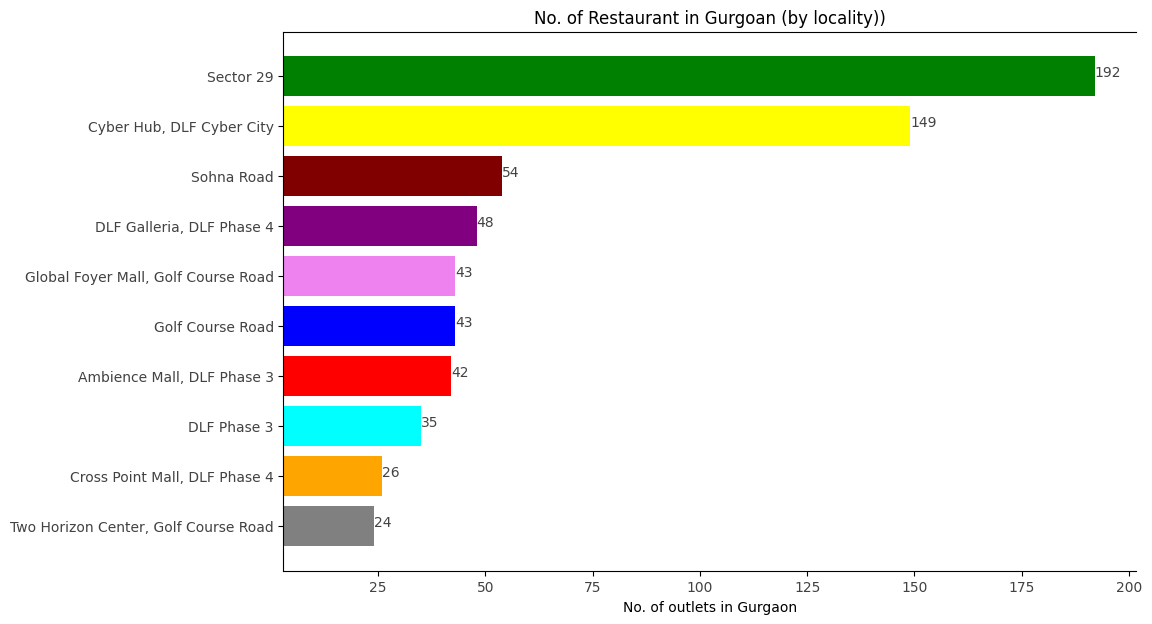

In [150]:
Localitycounts = data.groupby("locality").count()["res_id"].sort_values(ascending = True)[-10:]

height = pd.Series(Localitycounts.values)
bars = Localitycounts.index
ypos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible("#424242")
ax.spines["bottom"].set_visible("#424242")

colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
random.shuffle(colors)
plt.barh(ypos, height, color = colors)

plt.xlim(3)
plt.xticks(color = "#424242")
plt.yticks(ypos, bars, color = "#424242")
plt.xlabel("No. of outlets in Gurgaon")

for i, v in enumerate(height):
  ax.text(v+0.01, i, str(v), color = "#424242")

plt.title("No. of Restaurant in Gurgoan (by locality))")

plt.show()

In [151]:
rateLocal = data.groupby("locality").mean()["aggregate_rating"].sort_values(ascending = False)[:10]
rateLocal

<ipython-input-151-8a4637af6073>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rateLocal = data.groupby("locality").mean()["aggregate_rating"].sort_values(ascending = False)[:10]


locality
Global Foyer Mall, Golf Course Road              4.606977
MGF Mega City Mall, MG Road                      4.600000
Grand Mall, MG Road                              4.500000
Elements One Mall, Sector 49                     4.500000
Sushant Shopping Arcade, Sushant Lok, Gurgaon    4.433333
DLF Phase 1                                      4.420000
 ILD Trade Centre Mall, Sohna Road               4.400000
Sector 30                                        4.400000
Suncity Business Tower, Golf Course Road         4.370588
Shopping Mall, DLF Phase 1                       4.350000
Name: aggregate_rating, dtype: float64

In [152]:
voteLocal = data.groupby("locality").mean()["votes"].sort_values(ascending = False)[:10]
voteLocal

<ipython-input-152-cd2d3e1f90c2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  voteLocal = data.groupby("locality").mean()["votes"].sort_values(ascending = False)[:10]


locality
MGF Mega City Mall, MG Road                 5958.000000
Cyber Hub, DLF Cyber City                   2816.174497
MGF Metropolis Mall, MG Road                2617.818182
Grand Mall, MG Road                         2538.000000
Suncity Business Tower, Golf Course Road    2269.588235
Sector 29                                   1752.921875
Ambience Mall, DLF Phase 3                  1467.190476
Global Foyer Mall, Golf Course Road         1400.395349
Sector 14                                   1327.833333
Sector 31                                   1183.391304
Name: votes, dtype: float64

In [153]:
voteLocal = data.groupby("locality").mean()["photo_count"].sort_values(ascending = False)[:10]
voteLocal

<ipython-input-153-26d430c38fa3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  voteLocal = data.groupby("locality").mean()["photo_count"].sort_values(ascending = False)[:10]


locality
Suncity Business Tower, Golf Course Road    4374.176471
Sector 29                                   3734.223958
Cyber Hub, DLF Cyber City                   3519.093960
MGF Mega City Mall, MG Road                 2847.000000
Sector 30                                   2724.000000
Global Foyer Mall, Golf Course Road         1822.000000
The Leela Ambience, DLF Phase 3             1666.000000
Golf Course Road                            1417.186047
South Point Mall, Golf Course Road          1331.533333
Cross Point Mall, DLF Phase 4               1272.576923
Name: photo_count, dtype: float64

## **Cuisine**

**Unique Cuisines**

In [154]:
print("Total number of unique cuisines : ",data["cuisines"].nunique())
# data["cuisines"].unique()

Total number of unique cuisines :  340


**No. of Restaurant (By cuisine)**

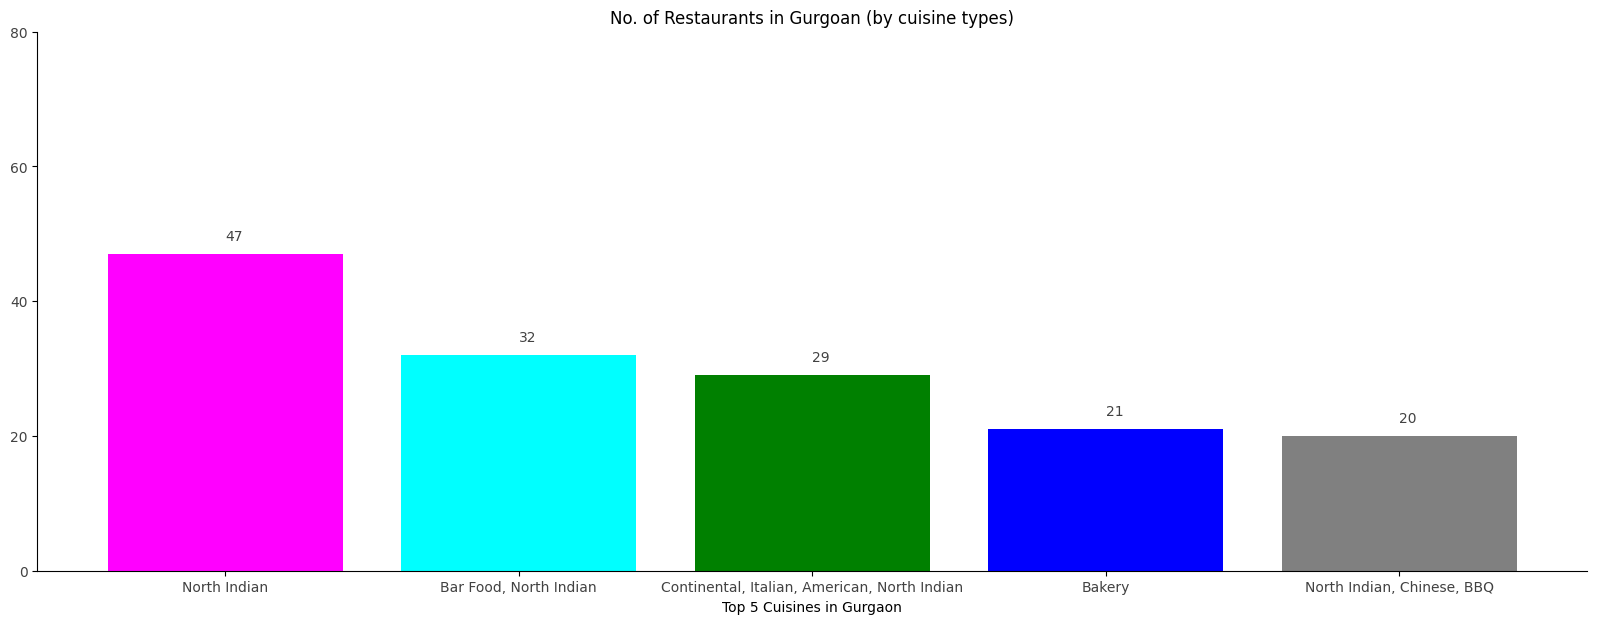

In [155]:
c_count = data["cuisines"].value_counts()[:5]
# c_count

fig = plt.figure(figsize=[20,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible("#424242")
ax.spines["bottom"].set_visible("#424242")

colors = ["green","blue","magenta","cyan","gray"]
random.shuffle(colors)
plt.bar(c_count.index, c_count.values, color = colors)

# plt.xlim(3)
plt.xticks(range(0, 5), color = "#424242")
plt.yticks(range(0, 100, 20), color = "#424242")
plt.xlabel("Top 5 Cuisines in Gurgaon")

for i, v in enumerate(c_count):
  ax.text(i, v+2, str(v), color = "#424242")

plt.title("No. of Restaurants in Gurgoan (by cuisine types)")

plt.show()

## **Highlights/Features of Restaurants**
**Unique Highlights**

In [156]:
data["highlights"].nunique()

581

## **Highlights Wordcloud**

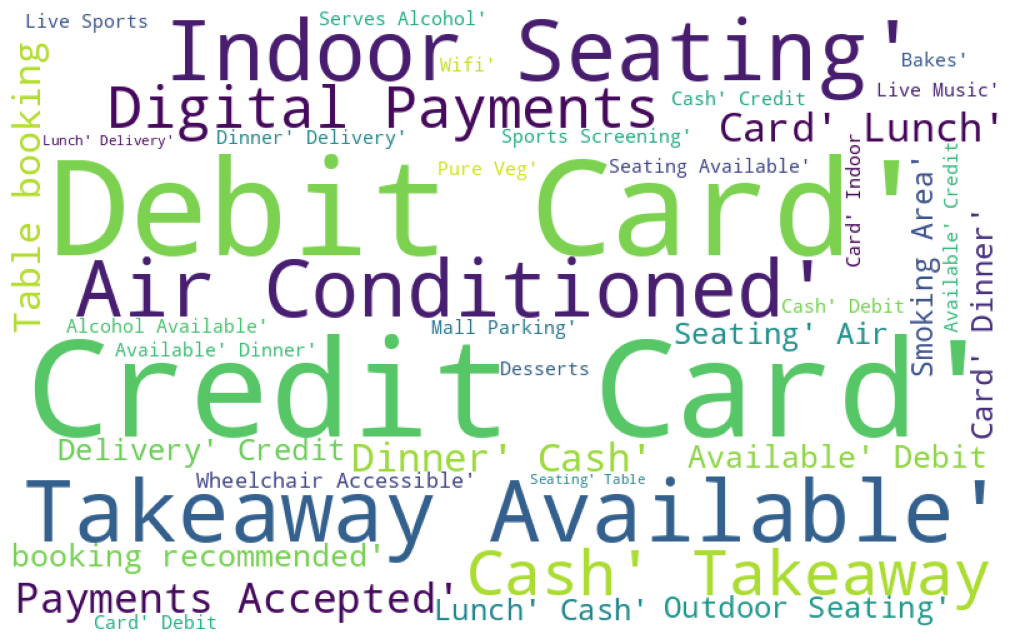

In [157]:
hstr = ""
h1 = data["highlights"].unique()

for i in h1:
  hstr += str(i) + " "
  wordcloud = WordCloud(width = 800, height = 500, background_color = "white", min_font_size = 10, max_words = 40).generate(hstr)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## **Ratings and Cost**

**Ratings distrtibution**

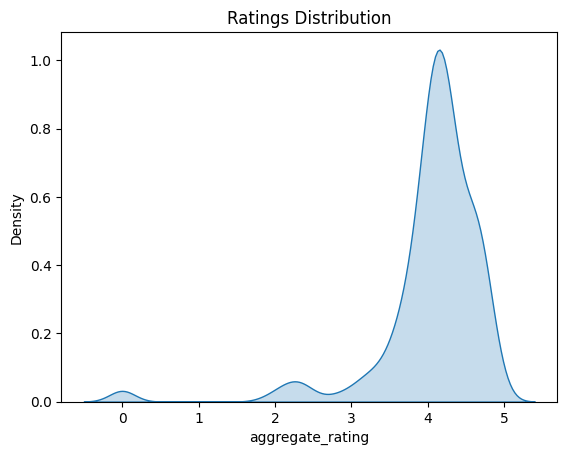

In [160]:
sns.kdeplot(data.aggregate_rating, fill = True)
plt.title("Ratings Distribution")
plt.show()

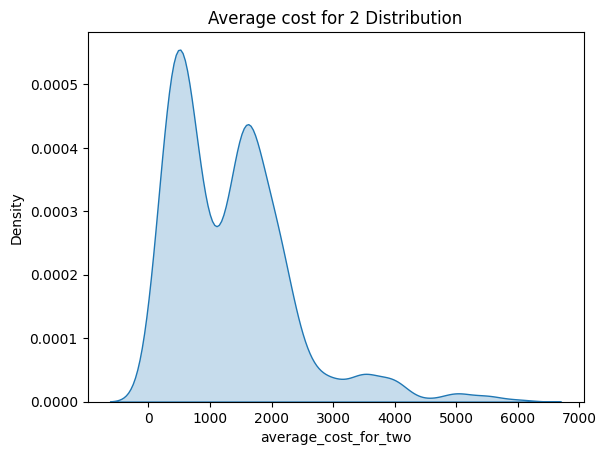

In [162]:
sns.kdeplot(data.average_cost_for_two, fill = True)
plt.title("Average cost for 2 Distribution")
plt.show()

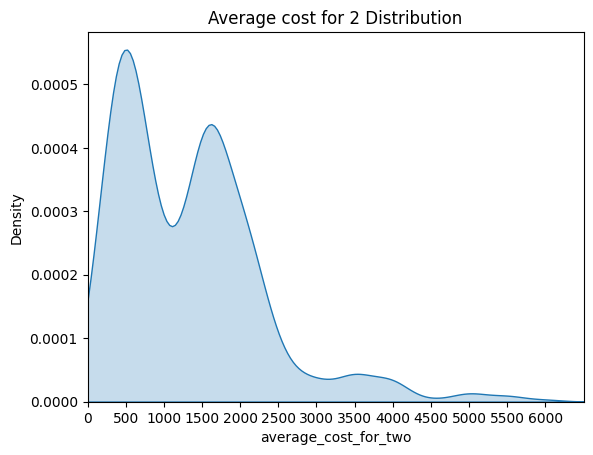

In [173]:
sns.kdeplot(data.average_cost_for_two, fill = True)
plt.xlim([0, 6500])
plt.xticks(range(0, 6500, 500))
plt.title("Average cost for 2 Distribution")
plt.show()

## **Price Range Count**

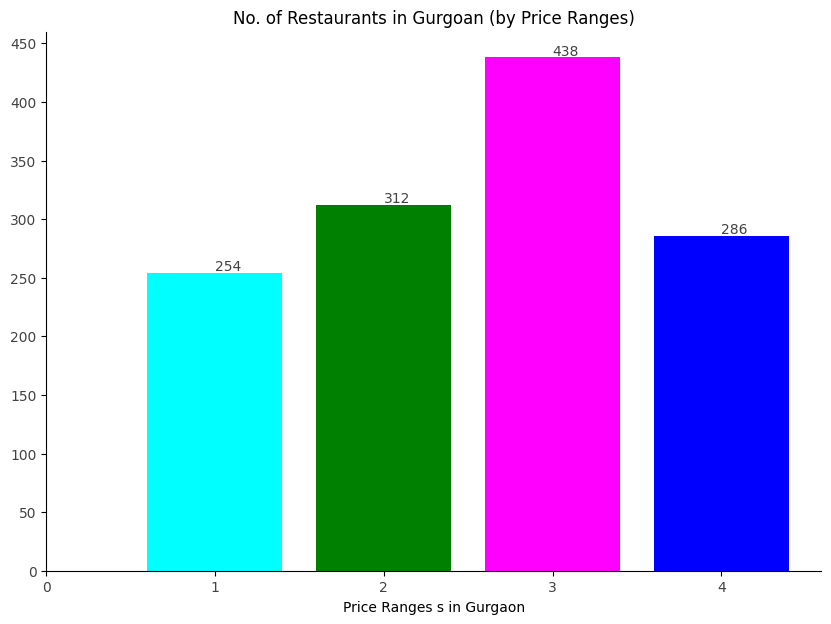

In [201]:
pr_count = data.groupby("price_range").count()["name"]

fig = plt.figure(figsize=[10,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible("#424242")
ax.spines["bottom"].set_visible("#424242")

colors = ["green","blue","magenta","cyan"]
random.shuffle(colors)
plt.bar(pr_count.index, pr_count.values, color = colors)

# plt.xlim(3)
plt.xticks(range(0, 5), color = "#424242")
plt.yticks(range(0, 500, 50), color = "#424242")
plt.xlabel("Price Ranges s in Gurgaon")

for i, v in enumerate(pr_count):
  ax.text(i+1, v+2, str(v), color = "#424242")

plt.title("No. of Restaurants in Gurgoan (by Price Ranges)")

plt.show()

In [202]:
np.round(data[["average_cost_for_two", "aggregate_rating"]].corr()["average_cost_for_two"][1],2)

0.25

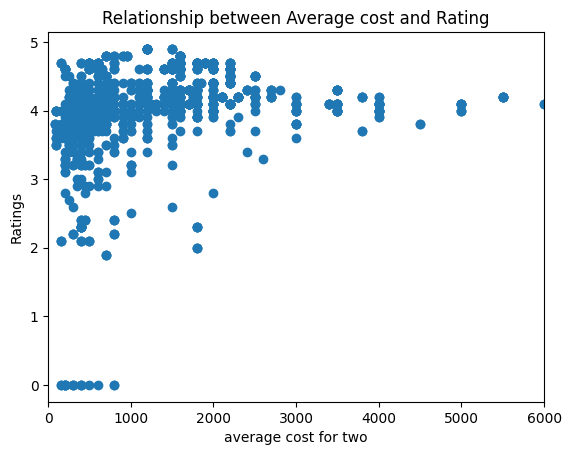

In [204]:
plt. plot("average_cost_for_two", "aggregate_rating", data=data, linestyle = "none", marker = "o")
plt.xlim([0, 6000])
plt.title("Relationship between Average cost and Rating")
plt.xlabel("average cost for two")
plt.ylabel("Ratings")
plt.show()

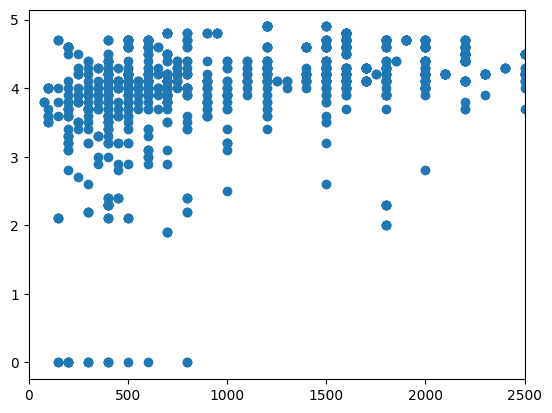

In [209]:
plt. plot("average_cost_for_two", "aggregate_rating", data=data.sample(1250), linestyle = "none", marker = "o")
plt.xlim([0, 2500])
# plt.title("Relationship between Average cost and Rating")
# plt.xlabel("average cost for two")
# plt.ylabel("Ratings")
plt.show()

In [210]:
np.round(data[["price_range", "aggregate_rating"]].corr()["price_range"][1],2)

0.37

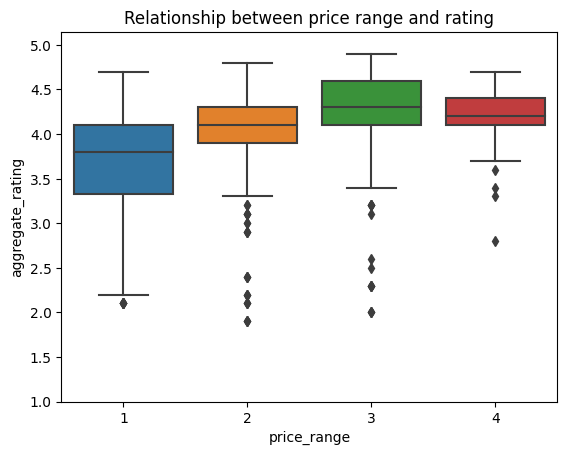

In [211]:
sns.boxplot(x = "price_range", y = "aggregate_rating", data=data)
plt.ylim(1)
plt.title("Relationship between price range and rating")
plt.show()

# **Conclusion**

After working on this data we can conclude the following things:

1. Approx 80% restaurants in Gurgaon are part of some chain.


2. Vapour Bar Exchange and Om Sweets and snacks are the biggest food chains in Gurgaon.


3. Absolute Barbeque, Friction The Drinkery and molecule Air Bar are the top rated food chains.


4. Casual Dining and Microbrewery types of establishment have the most number of outlets.


5. Establishments with alcohol availability have the highest number of votes, average rating and photocounts.


6. Sector 29 and DLF Cyber City have the most number of restaurants.


7. North Indian and Bar Food are the most loved cuisines.


8. Net Banking, Indoor Seating and Takeaway Facilities are the highlights and features of most of the restaurants.


9. Most restaurants have the rating between 3.5 and 4.5.


10. Most restaurants have an average cost for two in between INR 500 and INR 700.


11. Most of the restaurants are budget friendly with high ratings.


12. As the price range increases, the chances of getting highe rating increases.


13. Most of the restaurants are not expensive.



## **Thank You**

# **Submitted By: Mitali Bhat**